### Auditory Oddball ERP analysis: signal pre-processing
EEG signal filtering, artefact rejection, and segmenting based on the events.

In [5]:
# Import packages
import mne, os
import numpy as np
from cmath import nan
import matplotlib.pyplot as plt
import pandas as pd
from autoreject import (get_rejection_threshold, AutoReject)

# Set the default directory
os.chdir('/Users/tanijarv/Documents/GitHub/EEG-pyline')
mne.set_log_level('error')

# Import functions
import signal_processing.pre_process as prep
import basic.arrange_data as arrange

Define these variables!

In [6]:
# Folder where to get the raw EEG files
raw_folder = 'Data/Raw/'

# Folder where to export the clean epochs files
clean_folder = 'Data/Clean/'

# Sub-folder for the experiment (i.e. timepoint or group)
exp_folder = 'test_erp'

# EOG + mastoid channels and stimulus channel
eog_channels = ['EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8']
stimulus_channel = 'Status'

# Parameters for filter design
filter_design = dict(l_freq=1, h_freq=15, filter_length='auto', method='fir',
                     l_trans_bandwidth='auto', h_trans_bandwidth='auto',
                     phase='zero', fir_window='hamming', fir_design='firwin')

# Epoch time window from event/stimuli
tminmax = [-0.2, 0.8]

# Baseline correction time window
baseline_correction = (None,0)

# Event names (i.e. different stimuli) within the epochs and their IDs
event_dict = {'target after 1 standard': 17, 'target after 3 standards': 19,
              'target after 5 standards': 21, 'target after 7 standards': 23,
              'target after 9 standards': 25, 'target after 11 standards': 27}

# Target tone IDs
target_ids = [17, 19, 21, 23, 25, 27]

# Button press ID
button_id = 32

# Print more information
verbose = False

Run this to set the folders for data.

In [7]:
# Get directories of raw EEG files and set export directory for clean files
dir_inprogress = os.path.join(raw_folder,exp_folder)
export_dir = os.path.join(clean_folder,exp_folder)
file_dirs, subject_names = arrange.read_files(dir_inprogress,'.bdf')

Files in Data/Raw/test_erp read in: 1


Run this to pre-process the raw EEG files to clean epochs objects.

---
APPLYING FILTER

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 15 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 15.00 Hz
- Upper transition bandwidth: 3.75 Hz (-6 dB cutoff frequency: 16.88 Hz)
- Filter length: 3381 samples (3.302 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.3s finished


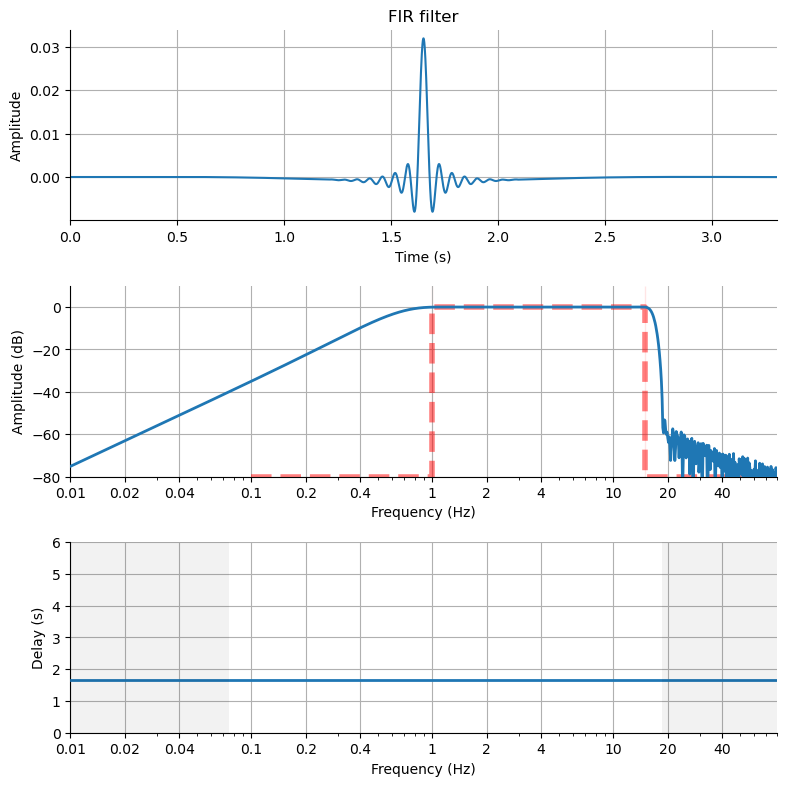

---
APPLYING SSP FOR EOG-REMOVAL

Running EOG SSP computation
Using EOG channels: EXG1, EXG2, EXG3, EXG4, EXG5, EXG6, EXG7, EXG8
EOG channel index for this subject is: [32 33 34 35 36 37 38 39]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10240 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 465 significant peaks
Number of EOG events detected: 465
Computing projector
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 35 Hz

FIR filter 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


Not setting metadata
465 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 465 events and 411 original time points ...
1 bad epochs dropped
Adding projection: eeg--0.200-0.200-PCA-01
Done.


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.7s finished


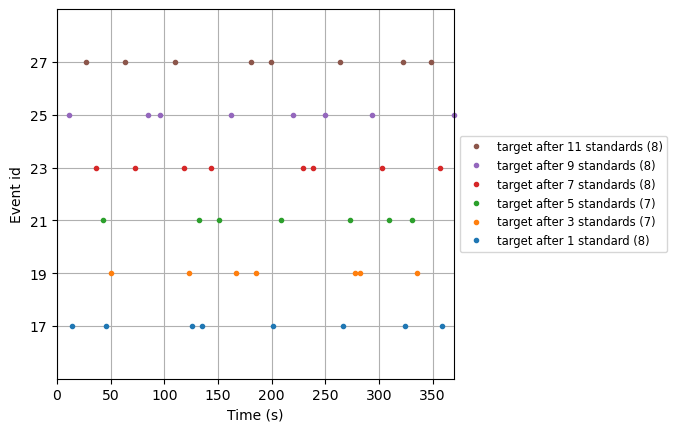

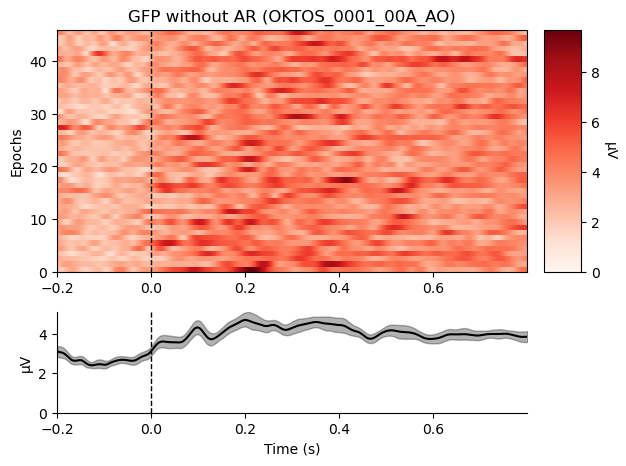

Estimating rejection dictionary for eeg
Dropping epochs with rejection threshold: {'eeg': 4.623745526590673e-05}
Running autoreject on ch_type=eeg




Estimated consensus=0.30 and n_interpolate=4


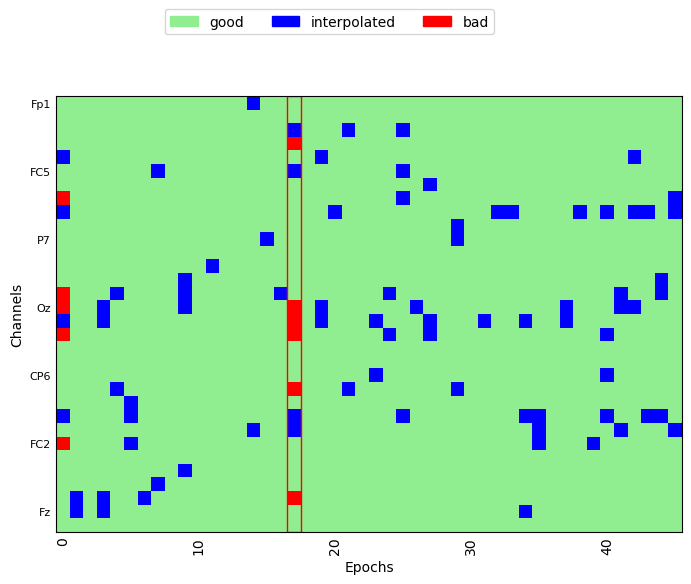

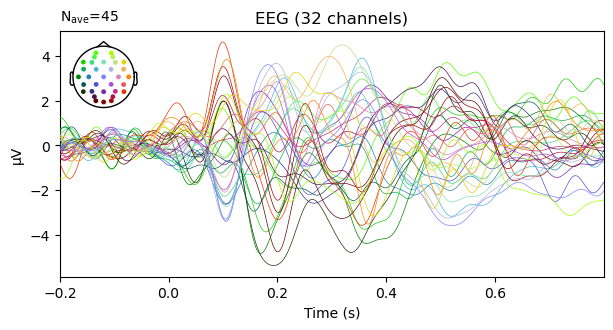

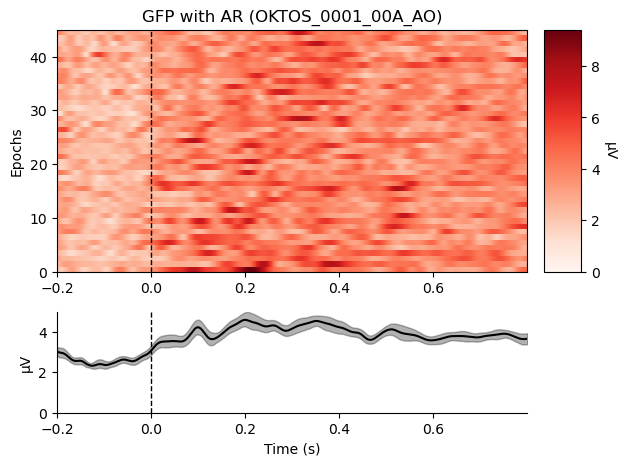

Number of events,45
Events,target after 1 standard: 8target after 11 standards: 8target after 3 standards: 7target after 5 standards: 7target after 7 standards: 7target after 9 standards: 8
Time range,-0.200 – 0.800 sec
Baseline,-0.200 – 0.000 sec


In [8]:
# Loop through all the subjects' directories (EEG files directories)
for i in range(len(file_dirs)):
        # Read in the raw EEG data
        raw = mne.io.read_raw_bdf(file_dirs[i], infer_types=True, eog=eog_channels,
                                  stim_channel=stimulus_channel)

        # Set the right montage (Biosemi32) and set reference as average across all channels
        raw = raw.set_montage(mne.channels.make_standard_montage('biosemi32')).load_data()\
                 .set_eeg_reference(ref_channels='average', verbose=verbose)
    
        # Filter the signal with bandpass filter and remove EOG artefacts with SSP
        filt = prep.filter_raw_data(raw,filter_design, line_remove=None, eog_channels=eog_channels,
                                    plot_filt=True, savefig=False)
        
        # Find events from the filtered EEG data and name them
        events = mne.find_events(filt, stim_channel=stimulus_channel, consecutive=False, output='onset')
        buttontarget_events = []

        # Create an array of target tone events which have been responded with a button press
        for m in range(len(events)):
                for n in target_ids:
                        if events[m][2] == n and events[m+1][2] == button_id:
                                buttontarget_events.append(events[m])
        buttontarget_events = np.asarray(buttontarget_events)
        
        # Plot all the events
        %matplotlib inline
        fig = mne.viz.plot_events(buttontarget_events, sfreq=filt.info['sfreq'],
                                first_samp=filt.first_samp, event_id=event_dict)
        fig.subplots_adjust(right=0.7)

        # Create epochs time-locked to target tone events which are followed by button press
        picks = mne.pick_types(filt.info, eeg=True, stim=False)
        epochs = mne.Epochs(filt, buttontarget_events, event_id=event_dict, tmin=tminmax[0],
                            tmax=tminmax[1], baseline=baseline_correction, picks=picks, preload=True)
        
        # Plot the epochs' GFP plot before artefact rejection
        epochs.plot_image(title="GFP without AR ({})".format(subject_names[i]))

        # Use AutoReject to repair and remove epochs which are artefactual
        reject_criteria = get_rejection_threshold(epochs)
        print('Dropping epochs with rejection threshold:',reject_criteria)
        epochs.drop_bad(reject=reject_criteria)

        ar = AutoReject(thresh_method='random_search', random_state=1)
        ar.fit(epochs)
        epochs_ar, reject_log = ar.transform(epochs, return_log=True)

        reject_log.plot('horizontal')

        # Plot the epochs' GFP after artefact rejection
        epochs_ar.average().plot()
        epochs_ar.plot_image(title="GFP with AR ({})".format(subject_names[i]))

        # Display the final epochs object meta-data
        display(epochs_ar)

        # Save the cleaned EEG file as .fif file
        try:
                os.makedirs(export_dir)
        except FileExistsError:
                pass
        try:
                mne.Epochs.save(epochs_ar, fname='{}/{}_clean-epo.fif'.format(export_dir,
                                                                              subject_names[i]),
                                                                              overwrite=True)
        except FileExistsError:
                pass